In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("measures_v2.csv")

In [3]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [4]:
X = df[["coolant","stator_tooth","motor_speed","i_d","ambient"]]
y = df['pm']

In [5]:
X

,coolant,stator_tooth,motor_speed,i_d,ambient
0,18.805172,18.293219,0.002866,0.004419,19.850691
1,18.818571,18.294807,0.000257,0.000606,19.850672
2,18.828770,18.294094,0.002355,0.001290,19.850657
3,18.835567,18.292542,0.006105,0.000026,19.850647
4,18.857033,18.291428,0.003133,-0.064317,19.850639
...,...,...,...,...,...
1330811,30.721298,41.934347,0.000380,-2.000169,23.989078
1330812,30.721306,41.868923,0.002985,-2.000499,23.970700
1330813,30.721312,41.804819,0.002301,-1.999268,23.977234
1330814,30.721316,41.762220,0.005662,-2.000999,24.001421


In [6]:
y

0          24.554214
1          24.538078
2          24.544693
3          24.554018
4          24.565397
             ...    
1330811    62.147780
1330812    62.142646
1330813    62.138387
1330814    62.133422
1330815    62.131429
Name: pm, Length: 1330816, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=120)

In [9]:
X_test.to_csv("motor_temperature_x_test.csv")
y_test.to_csv("motor_temperature_y_test.csv")

In [10]:
X_file = pd.read_csv("motor_temperature_x_test.csv")
y_file = pd.read_csv("motor_temperature_y_test.csv")

In [11]:
X_file

,Unnamed: 0,coolant,stator_tooth,motor_speed,i_d,ambient
0,323394,18.912889,67.900436,4160.385742,-134.575317,22.202339
1,128754,19.244606,39.452286,1999.979980,-43.509468,24.029152
2,636858,86.160619,101.576280,5629.457896,-107.556140,26.415942
3,237178,19.218369,68.737106,2249.974365,-39.683624,23.814714
4,541205,64.961685,75.187561,5249.946289,-165.800873,27.566597
...,...,...,...,...,...,...
266159,709801,39.555302,65.587842,2353.196184,-41.066115,26.005778
266160,260582,18.821289,88.925255,3499.974854,-219.004456,22.554008
266161,1129959,80.608879,75.692614,558.673670,-5.039310,25.907282
266162,35437,18.484861,41.248425,1999.984009,-43.510921,23.008720


In [12]:
y_file

,Unnamed: 0,pm
0,323394,71.887955
1,128754,42.903831
2,636858,79.895211
3,237178,85.640945
4,541205,65.363632
...,...,...
266159,709801,69.756848
266160,260582,93.122047
266161,1129959,57.710216
266162,35437,45.574883


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=120)

In [14]:
from sklearn.ensemble import RandomForestRegressor
rg =  RandomForestRegressor(n_estimators=11,random_state = 1)

In [15]:
rg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=11, random_state=1)

In [16]:
import joblib

In [17]:
joblib.dump(rg,"motor_temperature.joblib")

['motor_temperature.joblib']

In [18]:
loaded_rg = joblib.load("motor_temperature.joblib")

In [19]:
loaded_rg

RandomForestRegressor(n_estimators=11, random_state=1)

In [20]:
pred_y= loaded_rg.predict(X_test)
pred_y

array([71.89135326, 42.97173275, 79.91882504, ..., 57.71548725,
       45.49798445, 81.41937325])

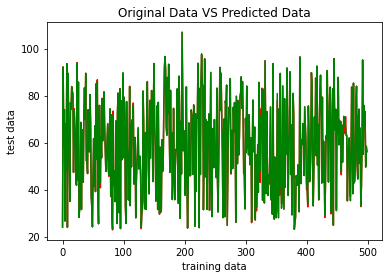

In [21]:
x = [i for i in range(500)]
plt.plot(x, y_test[500:1000], color = 'red')
plt.plot(x,pred_y[500:1000], color = 'green')
plt.xlabel("training data")
plt.ylabel("test data")
plt.title("Original Data VS Predicted Data")
plt.show()